In [1]:
# Se cargan las librerias necesarias para hacer la guia 3.
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import sklearn as skl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler


1️⃣ Preprocesamiento (EDA básico)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9660\1478363150.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=valores_nulos.index,y=valores_nulos.values,palette="coolwarm")


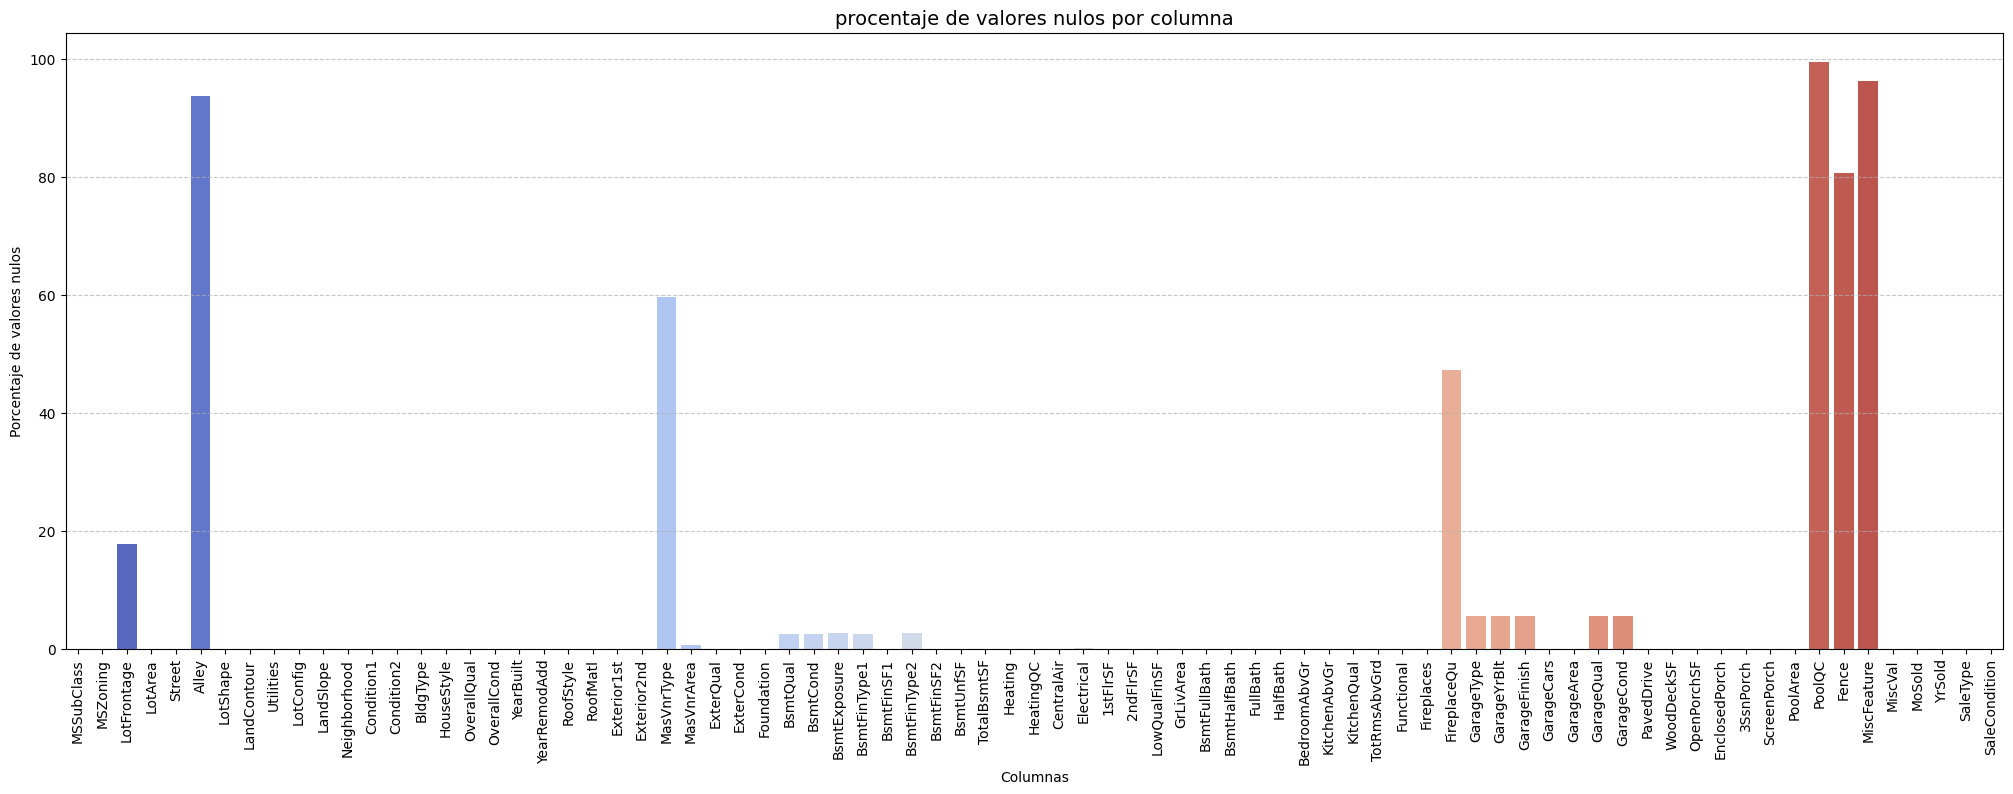

In [2]:
#1️⃣ Preprocesamiento (EDA básico)
#Cargar el dataset y visualizar las primeras filas (df.head()).


#print(df.head())

df = pd.read_csv("C:\\Users\\Lenovo\\Documents\\Machine learning 1\\Guia 3\\train.csv") 

#Identificar tipos de variables y valores nulos (df.info(), df.isnull().sum()).

print(df.info())


#print(f"Estos son los valores nulos \n\n {df.isnull().sum()}")

#Eliminar o imputar nulos (justificando la estrategia).

df = df.drop(columns=["Id","SalePrice"])

print(df.head())

print(f"Estos son los valores nulos \n\n {df.isnull().sum() / len(df) * 100}")

# Calcular el porcentaje de valores nulos
valores_nulos = (df.isnull().sum() / len(df)) * 100

plt.figure(figsize=(25,8))
sns.barplot(x=valores_nulos.index,y=valores_nulos.values,palette="coolwarm")
# Personalizar el gráfico
plt.title("procentaje de valores nulos por columna", fontsize=14)
plt.xlabel("Columnas")
plt.ylabel("Porcentaje de valores nulos")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
# Mostrar el gráfico
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9660\706597017.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=valores_nulos.index,y=valores_nulos.values,palette="coolwarm")


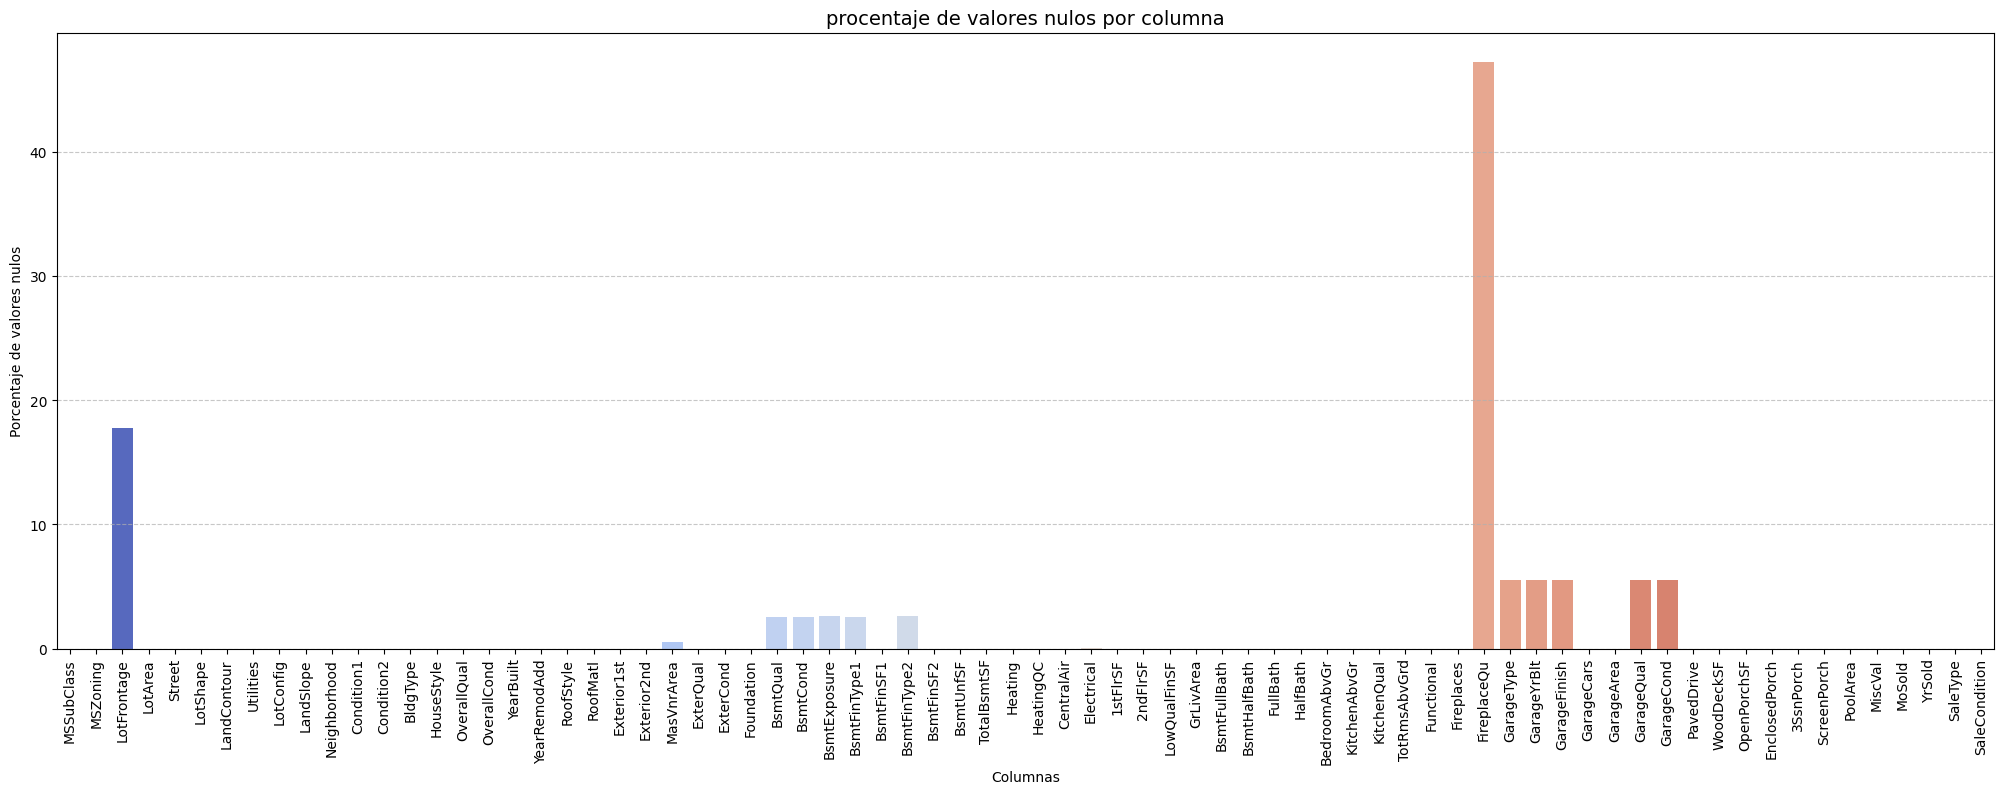

In [3]:

# Después del anáislis de nulos se eliminan las variables con 60% de valores nulos.

df = df.drop(columns=["Alley","PoolQC","Fence","MiscFeature","MasVnrType"])

# Calcular el porcentaje de valores nulos otra vez
valores_nulos = (df.isnull().sum() / len(df)) * 100

# Se dan las instrucciones para plotear otravez
plt.figure(figsize=(25,8))
sns.barplot(x=valores_nulos.index,y=valores_nulos.values,palette="coolwarm")
# Personalizar el gráfico
plt.title("procentaje de valores nulos por columna", fontsize=14)
plt.xlabel("Columnas")
plt.ylabel("Porcentaje de valores nulos")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
# Mostrar el gráfico
plt.show()


# IMPUTACIÓN DE DATOS: 

In [4]:
# IMPUTACIÓN DE DATOS: 

numerical_cols = df.select_dtypes(include=["int64","float64"]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Imputar valores numéricos con la mediana
imputer = SimpleImputer(strategy='median')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])
# Imputar valores categóricos con la moda
imputer2 = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer2.fit_transform(df[categorical_cols])




valores_nulos = (df.isnull().sum() / len(df)) * 100




In [5]:
#Seleccionar solo variables numéricas o categóricas codificadas (ideal para clustering).

# Grupo de variables numéricas: 
numerical_cols = df.select_dtypes(include=["int64","float64"]).columns.tolist()

# Grupo de variables categóricas: 
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()




df_final_united = pd.concat([df[numerical_cols]], axis=1)
print(df_final_united.describe())


        MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    69.863699   10516.828082     6.099315     5.575342   
std      42.300571    22.027677    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.117123   443.639726    46.549315  ...   
std      30.202904     20.645407   180.731373   456.098091   161.319273  ..

#Escalar los datos con StandardScaler o MinMaxScaler.

📊 Resumen de StandardScaler:
      MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0       0.073375    -0.220875 -0.207142     0.651479    -0.517200   1.050994   
1      -0.872563     0.460320 -0.091886    -0.071836     2.179628   0.156734   
2       0.073375    -0.084636  0.073480     0.651479    -0.517200   0.984752   
3       0.309859    -0.447940 -0.096897     0.651479    -0.517200  -1.863632   
4       0.073375     0.641972  0.375148     1.374795    -0.517200   0.951632   
...          ...          ...       ...          ...          ...        ...   
1455    0.073375    -0.357114 -0.260560    -0.071836    -0.517200   0.918511   
1456   -0.872563     0.687385  0.266407    -0.071836     0.381743   0.222975   
1457    0.309859    -0.175462 -0.147810     0.651479     3.078570  -1.002492   
1458   -0.872563    -0.084636 -0.080160    -0.795151     0.381743  -0.704406   
1459   -0.872563     0.233255 -0.058112    -0.795151     0.381743  -0.207594   

      Year

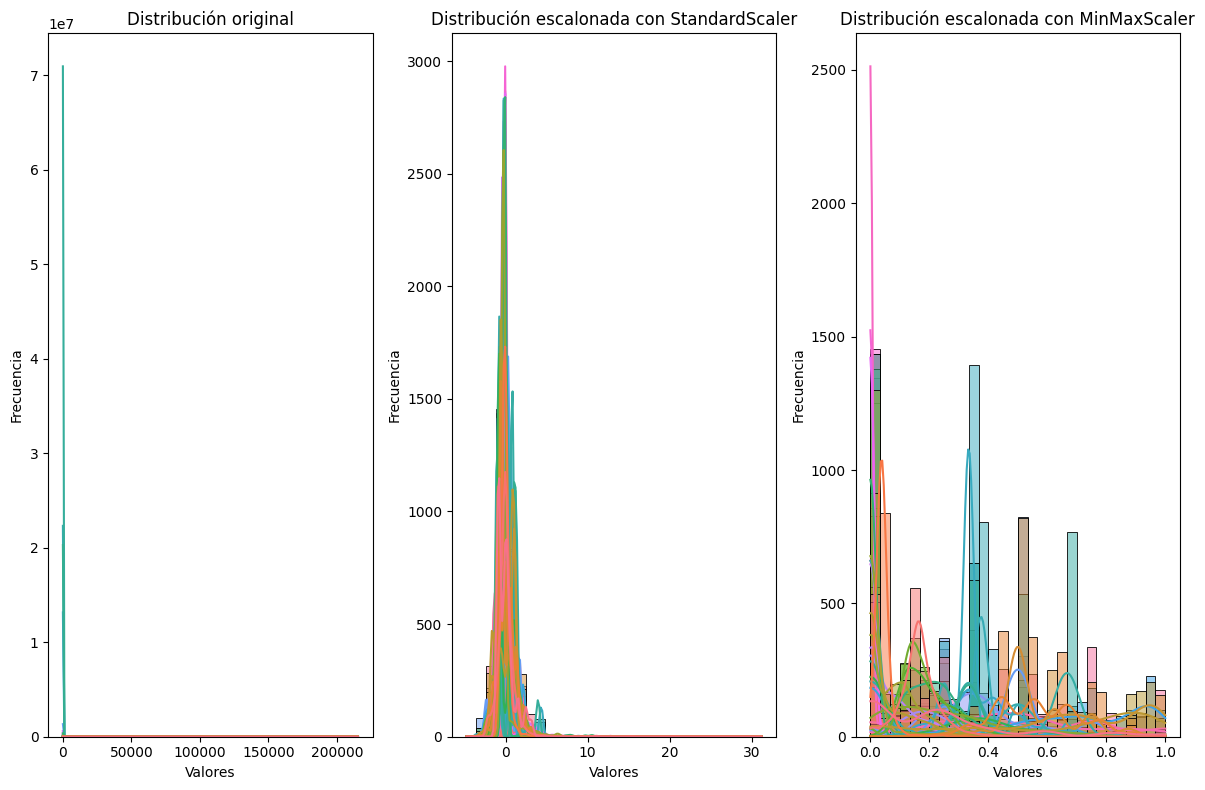

In [6]:
#Escalar los datos con StandardScaler o MinMaxScaler.

scaler = StandardScaler()
scaler_minmax = MinMaxScaler()


datos_escalados_scaler = scaler.fit_transform(df_final_united)
datos_escalados_minmax= scaler_minmax.fit_transform(df_final_united)

df_escalados_scaler = pd.DataFrame(scaler.fit_transform(df_final_united), columns=df_final_united.columns)
df_escalados_min_max = pd.DataFrame(scaler_minmax.fit_transform(df_final_united), columns=df_final_united.columns)
# Ver la diferencia en estadísticas
print("📊 Resumen de StandardScaler:")
print(df_escalados_scaler)

print("\n📊 Resumen de MinMaxScaler:")
print(df_escalados_min_max)




# Graficar Resultados entre los dos escaladores: 

fig, axes = plt.subplots(1, 3, figsize=(12, 8))
sns.histplot(df_final_united, bins=30, ax=axes[0], kde=True, color='skyblue', legend=False)
axes[0].set_title("Distribución original")
axes[0].set_xlabel("Valores")
axes[0].set_ylabel("Frecuencia")

sns.histplot(df_escalados_scaler, bins=30, ax=axes[1], kde=True, color='green', legend=False)
axes[1].set_title("Distribución escalonada con StandardScaler")
axes[1].set_xlabel("Valores")
axes[1].set_ylabel("Frecuencia")

sns.histplot(df_escalados_min_max, bins=30, ax=axes[2], kde=True, color='red', legend=False)
axes[2].set_title("Distribución escalonada con MinMaxScaler")
axes[2].set_xlabel("Valores")
axes[2].set_ylabel("Frecuencia")

 
plt.tight_layout()
plt.show()


- Distribución original 📊
- Los valores tienen una gran concentración cerca de cero.
- Hay un sesgo fuerte, con una frecuencia alta en los valores pequeños y una baja en los más grandes.
- StandardScaler 🔄
- La distribución se centra alrededor de 0.
- Los valores se transforman para tener media = 0 y desviación estándar = 1.
- Se eliminan efectos de magnitud, pero no altera la forma original completamente.
- MinMaxScaler 📉
- Los valores se ajustan al rango entre 0 y 1.
- Conserva la estructura de la distribución, pero comprime los datos en un intervalo fijo.
- Puede ser útil para modelos que requieren datos dentro de un rango específico.
Ambos métodos tran


**2️⃣ Reducción de dimensionalidad (opcional pero recomendable)\**

📊 Número óptimo de componentes scaler: 20
📊 Número óptimo de componentes minmax: 13


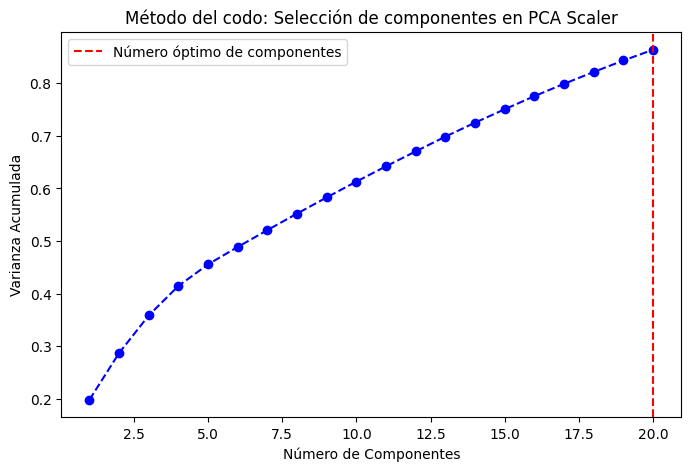

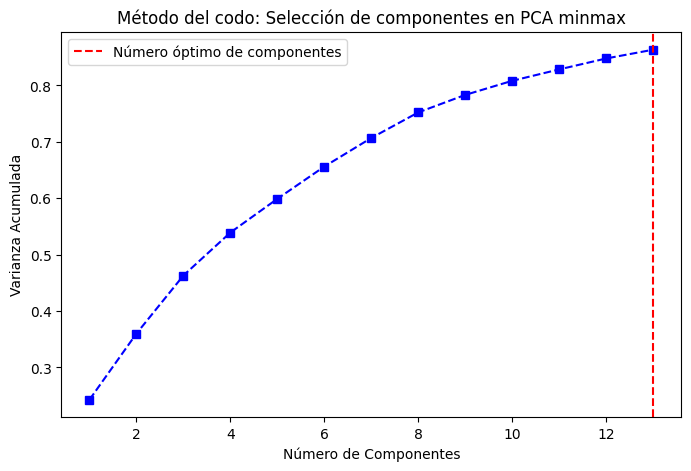

In [7]:
# Se aplica PCA 
from sklearn.decomposition import PCA

# Se llaman las variables del PCA
pca_escalados_scaler = PCA(n_components=20)
pca_escalados_minmax = PCA(n_components=13)
# Se tranforman los datos con PCA.
resultados_pca_scaler = pca_escalados_scaler.fit_transform(df_escalados_scaler)
resultados_pca_minmax = pca_escalados_minmax.fit_transform(df_escalados_min_max)



# Mostrar cuántas componentes explican el 85% de la varianza con Scaler
varianza_acumulada_final_scaler = np.cumsum(pca_escalados_scaler.explained_variance_ratio_)
num_componentes_optimas_scaler = np.argmax(varianza_acumulada_final_scaler  >= 0.85) + 1
print(f"📊 Número óptimo de componentes scaler: {num_componentes_optimas_scaler}")

# Mostrar cuántas componentes explican el 85% de la varianza con Minmax
varianza_acumulada_final_minmax = np.cumsum(pca_escalados_minmax.explained_variance_ratio_)
num_componentes_optimas_minmax = np.argmax(varianza_acumulada_final_minmax >= 0.85) + 1
print(f"📊 Número óptimo de componentes minmax: {num_componentes_optimas_minmax}")

# Graficar el Codo con scaler
plt.figure(figsize=(8,5))
plt.plot(range(1,len(varianza_acumulada_final_scaler)+1), varianza_acumulada_final_scaler, marker="o", linestyle="--", color="blue")
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Acumulada")
plt.title("Método del codo: Selección de componentes en PCA Scaler")
plt.axvline(x=20, color="red", linestyle="--", label="Número óptimo de componentes")
plt.legend()
plt.show()
# Graficar el Codo con minmax
plt.figure(figsize=(8,5))
plt.plot(range(1,len(varianza_acumulada_final_minmax)+1), varianza_acumulada_final_minmax, marker="s", linestyle="--", color="blue")
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Acumulada")
plt.title("Método del codo: Selección de componentes en PCA minmax")
plt.axvline(x=13, color="red", linestyle="--", label="Número óptimo de componentes")
plt.legend()
plt.show()


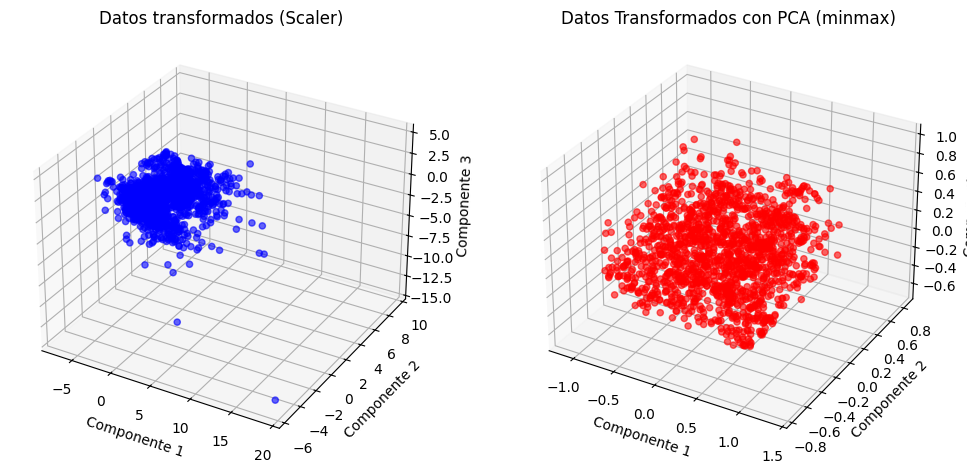

In [8]:
import plotly.express as px  
import pandas as pd  


# Graficar los componentes principales para observar distribución y estructura.

fig, axes = plt.subplots(1,2, figsize=(12,6), subplot_kw={"projection":"3d"})



# Antes de PCA: Datos originales escalados

axes[0].scatter(resultados_pca_scaler[:,0], resultados_pca_scaler[:,1], resultados_pca_scaler[:,2], c="blue", alpha=0.6)
axes[0].set_title("Datos transformados (Scaler)")
axes[0].set_xlabel("Componente 1")
axes[0].set_ylabel("Componente 2")
axes[0].set_zlabel("Componente 3")


# Después de PCA: primeras 3 componentes princiaples.
axes[1].scatter(resultados_pca_minmax[:,0],resultados_pca_minmax[:,1],resultados_pca_minmax[:,2], c="red", alpha=0.6)
axes[1].set_title("Datos Transformados con PCA (minmax)")
axes[1].set_xlabel("Componente 1")
axes[1].set_ylabel("Componente 2")
axes[1].set_zlabel("Componente 3")


fig = px.scatter_3d(df_final_united,  
                     x="LotArea",  
                     y="OverallQual",  
                     z="GrLivArea")  
fig.update_layout(title="Datos Originales (Interactivo)")  
fig.show()   


Se aplica PCA a las variables numéricas para reducir la dimensionalidad de los datos.

Se saca la varianza acumulada para saber cuál es el número óptimo de componentes, en este caso para scalado scaler 20 y minmax 13. Por tanto se utiliza explained_variance_ratio_.



3️⃣ Clustering

Kmeans con escalado SCALER

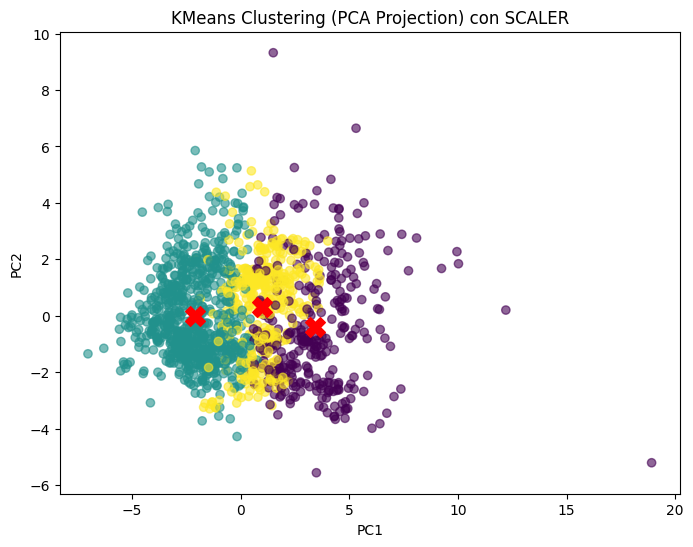

In [9]:
#Aplicar al menos dos técnicas distintas:


#

# Se llama el modelo kmeans para el escalado SCALER
from sklearn.cluster import KMeans
# Se escogen los parametros para kmeans.
kmeans_scaler = KMeans(n_clusters=3,random_state=42)
# Se entrena el modelo.
clusters_kmeans_scaler = kmeans_scaler.fit(resultados_pca_scaler)
etiquetas_kmeans_scaler = kmeans_scaler.labels_ 


# Crear DataFrames con etiquetas de cluster
df_pca_scaler_kmeans = pd.DataFrame(resultados_pca_scaler[:, :3], columns=["PC1", "PC2", "PC3"]) # NO USAR DESPUÉS
df_pca_scaler_kmeans["Cluster_kmeans"] = etiquetas_kmeans_scaler



# Visualizacion de los clusters kmeans usando el resultado de PCA
plt.figure(figsize=(8,6))
plt.scatter(resultados_pca_scaler[:, 0], resultados_pca_scaler[:, 1], c=etiquetas_kmeans_scaler, cmap='viridis', alpha=0.6)
plt.scatter(kmeans_scaler.cluster_centers_[:, 0],kmeans_scaler.cluster_centers_[:, 1], c='red', marker="X",s=200,label="centroides")
plt.title('KMeans Clustering (PCA Projection) con SCALER')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()




Kmeans con escalado MINMAX

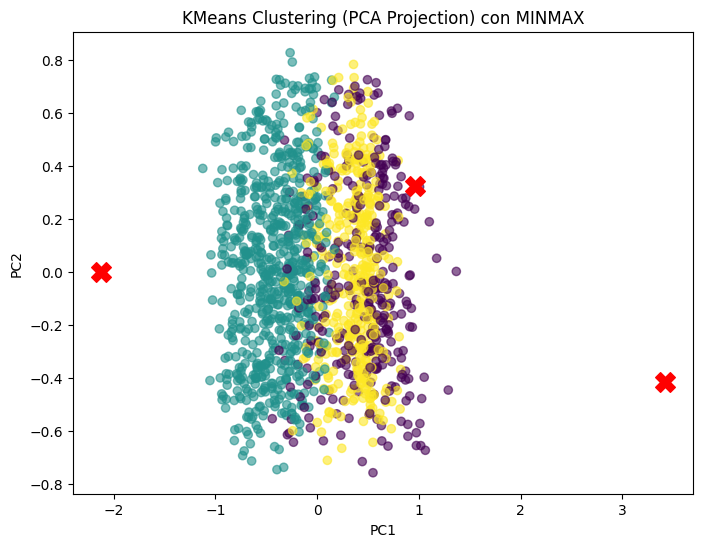

In [10]:
#Aplicar al menos dos técnicas distintas:

# Se llama el modelo kmeans para el escalado MINMAX
from sklearn.cluster import KMeans
# Se escogen los parametros para kmeans.
kmeans_minmax = KMeans(n_clusters=3,random_state=42)
# Se entrena el modelo.
clusters_kmeans_minmax = kmeans_minmax.fit(resultados_pca_scaler)
etiquetas_kmeans_minmax = kmeans_minmax.labels_ 


df_pca_minmax = pd.DataFrame(resultados_pca_minmax[:, :3], columns=["PC1", "PC2", "PC3"])# NO USAR DESPUÉS
df_pca_minmax["Cluster_kmeans_min"] = etiquetas_kmeans_minmax

# Visualizacion de los clusters kmeans usando el resultado de PCA
plt.figure(figsize=(8,6))
plt.scatter(resultados_pca_minmax[:, 0], resultados_pca_minmax[:, 1], c=etiquetas_kmeans_minmax, cmap='viridis', alpha=0.6)
plt.scatter(kmeans_minmax.cluster_centers_[:, 0],kmeans_minmax.cluster_centers_[:, 1], c='red', marker="X",s=200,label="centroides")
plt.title('KMeans Clustering (PCA Projection) con MINMAX')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


4️⃣ Evaluación de los clústeres kmeans

Calculamos el Silhouette Score para K-Means  y Davis Boudins. KMEANS

In [11]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
 

# Calculamos el Silhouette Score para K-Means  
silhouette_avg_kmeans_scaler = silhouette_score(resultados_pca_scaler, etiquetas_kmeans_scaler)  
silhouette_avg_kmeans_minmax = silhouette_score(resultados_pca_minmax, etiquetas_kmeans_minmax)  

print(f"Silhouette Score KMeans (Scaler): {silhouette_avg_kmeans_scaler:.3f}")  
print(f"Silhouette Score KMeans (MinMaxScaler): {silhouette_avg_kmeans_minmax:.3f}")  
# Calculamos el Silhouette Score para Davis Boudins.
db_score_scaler = davies_bouldin_score( resultados_pca_scaler, etiquetas_kmeans_scaler)
print(f"Davis Boudin Score (Scaler): {db_score_scaler:.3f}")  
 
db_score_minmax = davies_bouldin_score(resultados_pca_minmax, etiquetas_kmeans_minmax)
print(f"Davis Boudin Score (MinMaxScaler): {db_score_minmax:.3f}") 

Silhouette Score KMeans (Scaler): 0.105
Silhouette Score KMeans (MinMaxScaler): 0.117
Davis Boudin Score (Scaler): 2.517
Davis Boudin Score (MinMaxScaler): 2.925


Datos con DBSCAN y StandardScaler:
         PC1       PC2       PC3  Cluster_DBSCAN
0  1.466021  0.375461  1.698616              -1
1 -0.032837 -1.058352 -1.259901              -1
2  1.652691  0.252552  1.475425              -1
3 -0.368137  1.036425 -0.782022              -1
4  4.411778  1.115727  0.514540              -1

Datos con DBSCAN y MinMaxScaler:
         PC1       PC2       PC3  Cluster_DBSCAN_min
0  0.492427  0.118482  0.208697                   0
1 -0.121454 -0.116552 -0.260003                   0
2  0.535528 -0.036311  0.172966                   0
3 -0.168763 -0.410712  0.016770                   0
4  0.752436 -0.164150  0.267805                   0
Datos con DBSCAN y StandardScaler:
         PC1       PC2       PC3  Cluster_DBSCAN
0  1.466021  0.375461  1.698616              -1
1 -0.032837 -1.058352 -1.259901              -1
2  1.652691  0.252552  1.475425              -1
3 -0.368137  1.036425 -0.782022              -1
4  4.411778  1.115727  0.514540              -1

Dato

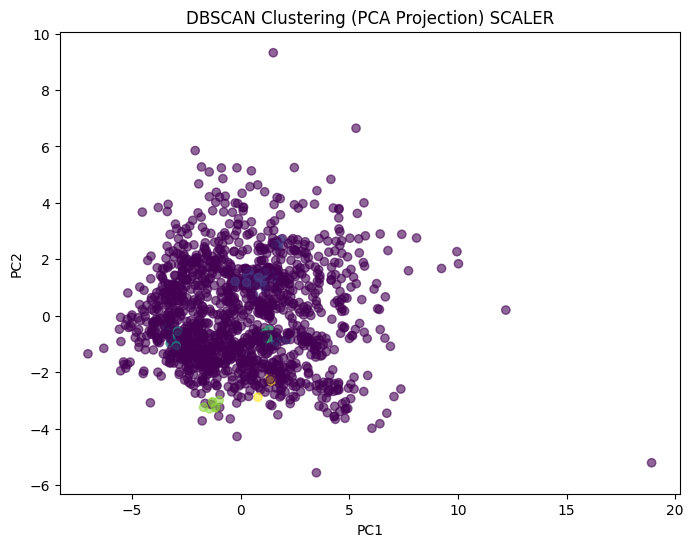

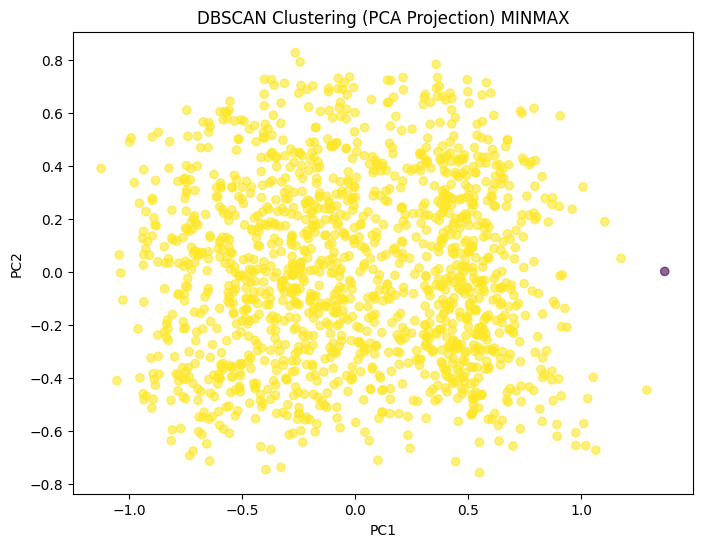

In [12]:
from sklearn.cluster import DBSCAN


# Se aplica el método DBSCAN para escaler, eps se calcula con nearest neighbors después
dbscan_housing = DBSCAN(eps=1.5, min_samples=5)
clusters_dbscan_scaler = dbscan_housing.fit_predict(resultados_pca_scaler)


from sklearn.cluster import DBSCAN


# Se aplica el método DBSCAN para minmax, eps se calcula con nearest neighbors después
dbscan_housing = DBSCAN(eps=1.1, min_samples=5)
clusters_dbscan_minmax = dbscan_housing.fit_predict(resultados_pca_minmax)


# Se gráfica DBSCAN Scaler 3D

# Crear DataFrames con etiquetas de cluster
df_pca_scaler = pd.DataFrame(resultados_pca_scaler[:, :3], columns=["PC1", "PC2", "PC3"]) # NO USAR DESPUÉS
df_pca_scaler["Cluster_DBSCAN"] = clusters_dbscan_scaler

df_pca_minmax = pd.DataFrame(resultados_pca_minmax[:, :3], columns=["PC1", "PC2", "PC3"])# NO USAR DESPUÉS
df_pca_minmax["Cluster_DBSCAN_min"] = clusters_dbscan_minmax

# Mostrar información básica
print("Datos con DBSCAN y StandardScaler:\n", df_pca_scaler.head())
print("\nDatos con DBSCAN y MinMaxScaler:\n", df_pca_minmax.head())


# Mostrar información básica
print("Datos con DBSCAN y StandardScaler:\n", df_pca_scaler.head())
print("\nDatos con DBSCAN y MinMaxScaler:\n", df_pca_minmax.head())

# Se gráfica DBSCAN Scaler 2D
plt.figure(figsize=(8,6))
plt.scatter(resultados_pca_scaler[:, 0], resultados_pca_scaler[:, 1], c=clusters_dbscan_scaler, cmap='viridis', alpha=0.6)
plt.title('DBSCAN Clustering (PCA Projection) SCALER')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Se  grafíca DBSCAN minmax
plt.figure(figsize=(8,6))
plt.scatter(resultados_pca_minmax[:, 0], resultados_pca_minmax[:, 1], c=clusters_dbscan_minmax, cmap='viridis', alpha=0.6)
plt.title('DBSCAN Clustering (PCA Projection) MINMAX')
plt.xlabel('PC1')
plt.ylabel('PC2')




# Gráfico DBSCAN con StandardScaler
fig_scaler = px.scatter_3d(df_pca_scaler, x="PC1", y="PC2", z="PC3",  
                           color="Cluster_DBSCAN", opacity=0.7,  
                           color_continuous_scale="viridis")  
fig_scaler.update_layout(title="DBSCAN en PCA 3D con StandardScaler")  
fig_scaler.show()  

# Gráfico DBSCAN con MinMaxScaler
fig_minmax = px.scatter_3d(df_pca_minmax, x="PC1", y="PC2", z="PC3",  
                           color="Cluster_DBSCAN_min", opacity=0.7,  
                           color_continuous_scale="viridis")  
fig_minmax.update_layout(title="DBSCAN en PCA 3D con MinMaxScaler")  
fig_minmax.show()  





# Utilizamos  NearestNeighbors para saber la distancia más adecuada.

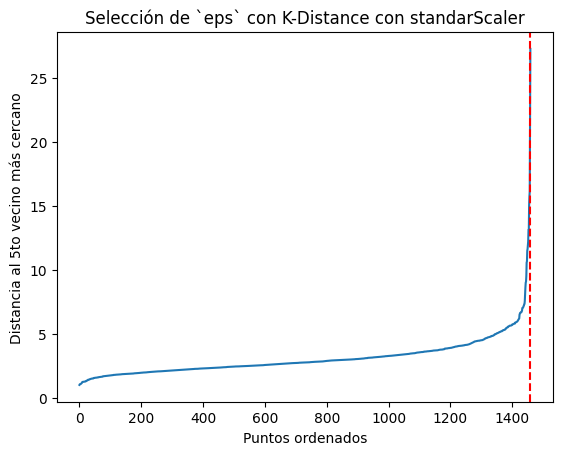

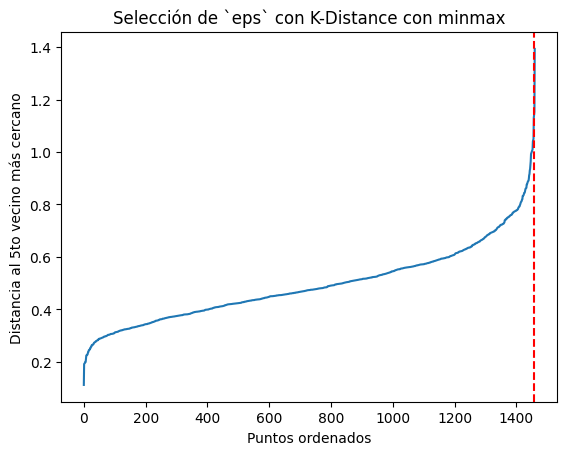

Eps óptimo (Scaler): 21.669
Eps óptimo (MinMaxScaler): 1.153


In [13]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

vecinos_scaler = NearestNeighbors(n_neighbors=5, metric='euclidean')  # Número de vecinos y métrica de distancia
vecinos_scaler.fit(resultados_pca_scaler)  # Aplicar a los datos
distancias_scaler, indices_scaler = vecinos_scaler.kneighbors(resultados_pca_scaler)

vecinos_minmax = NearestNeighbors(n_neighbors=5, metric='euclidean')  # Número de vecinos y métrica de distancia
vecinos_minmax.fit(resultados_pca_minmax)  # Aplicar a los datos
distancias_minmax, indices_minmax = vecinos_minmax.kneighbors(resultados_pca_minmax)


# Encontrar el índice del punto óptimo (aproximación visual)
distancias_scaler_ordenadas = np.sort(distancias_scaler[:, -1]) 
punto_optimo_idx = np.argmax(np.diff(distancias_scaler_ordenadas))



import numpy as np  
import matplotlib.pyplot as plt  

# Ordenar las distancias para visualizar la curva  
distancias_scaler_ordenadas = np.sort(distancias_scaler[:, -1])  # Última distancia (5º vecino)  
distancias_minmax_ordenadas = np.sort(distancias_minmax[:, -1])
# Encontrar el índice del punto óptimo (aproximación visual)
punto_optimo_idx_scaler = np.argmax(np.diff(distancias_scaler_ordenadas))  # Mayor cambio en la pendiente  
punto_optimo_valor_scaler = distancias_scaler_ordenadas[punto_optimo_idx]  

punto_optimo_idx_minmax = np.argmax(np.diff(distancias_minmax_ordenadas))  # Mayor cambio en la pendiente  
punto_optimo_valor_minmax = distancias_minmax_ordenadas[punto_optimo_idx_minmax] 



# Graficamos la curva para encontrar el "codo" para SCALER
distancias_scaler = np.sort(distancias_scaler[:, -1], axis=0)
plt.plot(distancias_scaler)
plt.xlabel("Puntos ordenados")
plt.ylabel("Distancia al 5to vecino más cercano")
plt.axvline(x=punto_optimo_idx_scaler, color='red', linestyle='--', label=f"Punto óptimo ({punto_optimo_valor_scaler:.2f})")
plt.title("Selección de `eps` con K-Distance con standarScaler")
plt.show()


# Graficamos la curva para encontrar el "codo" para MINMAX
distancias_minmax = np.sort(distancias_minmax[:, -1], axis=0)
plt.plot(distancias_minmax)
plt.xlabel("Puntos ordenados")
plt.ylabel("Distancia al 5to vecino más cercano")
plt.axvline(x=punto_optimo_idx_minmax, color='red', linestyle='--', label=f"Punto óptimo ({punto_optimo_valor_minmax:.2f})")
plt.title("Selección de `eps` con K-Distance con minmax")
plt.show()

eps_optimo_scaler = distancias_scaler_ordenadas[punto_optimo_idx_scaler]
eps_optimo_minmax = distancias_minmax_ordenadas[punto_optimo_idx_minmax]
print(f"Eps óptimo (Scaler): {eps_optimo_scaler:.3f}")
print(f"Eps óptimo (MinMaxScaler): {eps_optimo_minmax:.3f}")


4️⃣ Evaluación de los clústeres DBSCAN

# Calculamos el Silhouette Score Y Davis Boudin para DBSCAN

In [14]:
# Calculamos el Silhouette Score para K-Means  
from sklearn.metrics import silhouette_score
import numpy as np

import pandas as pd

# Filtrar solo los puntos que NO son ruido (-1)
df_limpio_scaler = df_pca_scaler[df_pca_scaler["Cluster_DBSCAN"] != -1]
df_limpio_minmax = df_pca_minmax[df_pca_minmax["Cluster_DBSCAN_min"] != -1]

num_clusters_minmax = len(set(clusters_dbscan_minmax))

if num_clusters_minmax > 1: 
 print(num_clusters_minmax)
else:
 print("DBSCAN escalado con MINMAX solo tiene un cluster no se puede medir el silhouette ni el Davis Boudin")

# Calcular Silhouette Score solo para puntos con cluster asignado
silhouette_avg_dbscan_scaler = silhouette_score(df_limpio_scaler.iloc[:, :-1], df_limpio_scaler["Cluster_DBSCAN"])
silhouette_avg_dbscan_minmax = silhouette_score(resultados_pca_minmax, clusters_dbscan_minmax)

print(f"Silhouette Score DBSCAN (Scaler): {silhouette_avg_dbscan_scaler:.3f}")
print(f"Silhouette Score DBSCAN (MinMaxScaler): {silhouette_avg_dbscan_minmax:.3f}")


# Calculamos el Silhouette Score para Davis Boudins.
db_score_scaler = davies_bouldin_score( resultados_pca_scaler, clusters_dbscan_scaler)
print(f"Davis Boudin Score DBSCAN (Scaler): {db_score_scaler:.3f}")  
print(f"Davis Boudin Score DBSCAN (MinMaxScaler): {db_score_minmax:.3f}") 


2
Silhouette Score DBSCAN (Scaler): 0.640
Silhouette Score DBSCAN (MinMaxScaler): 0.450
Davis Boudin Score DBSCAN (Scaler): 1.657
Davis Boudin Score DBSCAN (MinMaxScaler): 2.925


In [15]:
# Se trae AgglomeraticeClustering y cluster.hierarchy
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


# Se llama el modelo agglomerative para SCALER
agg_clustering_scaler = AgglomerativeClustering(n_clusters=4, linkage="ward")
clusters_agg_scaler = agg_clustering_scaler.fit_predict(resultados_pca_scaler)

# Se llama el modelo agglomerative para MINMAX
agg_clustering_minmax = AgglomerativeClustering(n_clusters=2, linkage="ward")
clusters_agg_minmax = agg_clustering_minmax.fit_predict(resultados_pca_minmax)


# Crear DataFrames con etiquetas de cluster
df_pca_scaler_agglomerative = pd.DataFrame(resultados_pca_scaler[:, :3], columns=["PC1", "PC2", "PC3"]) # NO USAR DESPUÉS
df_pca_scaler_agglomerative["Cluster_agglomerative"] = clusters_agg_scaler

df_pca_minmax_agglomerative = pd.DataFrame(resultados_pca_minmax[:, :3], columns=["PC1", "PC2", "PC3"])# NO USAR DESPUÉS
df_pca_minmax_agglomerative["Cluster_agglomerative_min"] = clusters_agg_minmax


# Se grafica en 3D el gráfico de Agglomerative Clustering

fig = px.scatter_3d(df_pca_scaler_agglomerative,x="PC1",y="PC2",z="PC3",
                    color="Cluster_agglomerative", opacity=0.7,
                    color_continuous_scale="viridis")

fig.update_layout(title="Clustering con Agglomerative Clustering en PCA 3D - Interactivo - scaler")
fig.show()

# Se grafica en 3D el gráfico de Agglomerative Clustering

fig = px.scatter_3d(df_pca_minmax_agglomerative,x="PC1",y="PC2",z="PC3",
                    color="Cluster_agglomerative_min", opacity=0.7,
                    color_continuous_scale="viridis")

fig.update_layout(title="Clustering con Agglomerative Clustering en PCA 3D - Interactivo - minmax")
fig.show()




Dendograma para scaler. Saber el número ótimo de clusters.

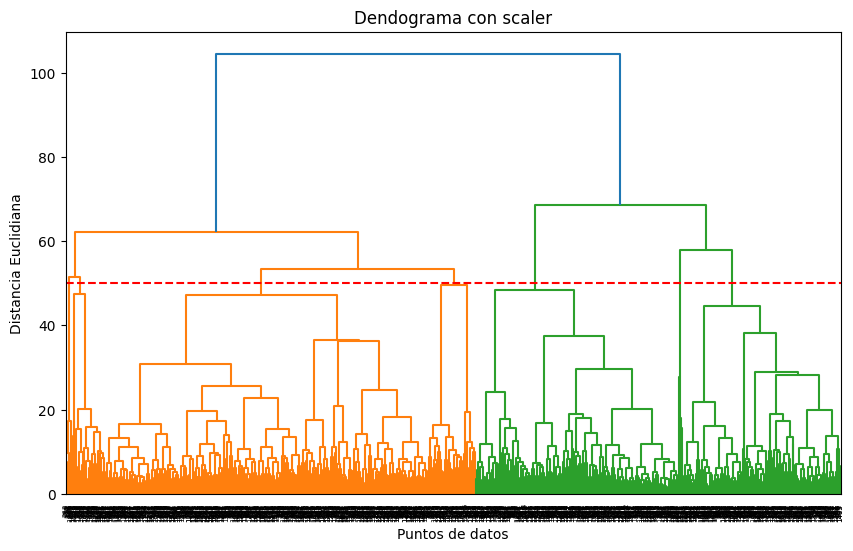

In [16]:
# Se construye el dendograma con el método "Ward" todos los datos

plt.figure(figsize=(10,6))

dendogram = sch.dendrogram(sch.linkage(resultados_pca_scaler, method="ward"))
plt.title("Dendograma con scaler")
plt.xlabel("Puntos de datos")
plt.ylabel("Distancia Euclidiana")
plt.axhline(y=50, color='r', linestyle='--', label='Corte óptimo')
plt.show()



Dendograma para minmax. Saber el número ótimo de clusters.

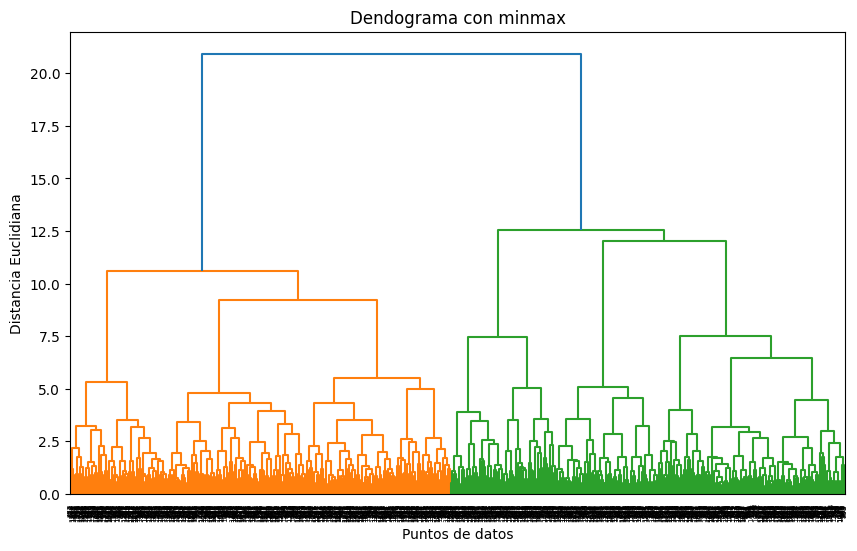

In [17]:
# Se hace el gráfico scaler
plt.figure(figsize=(10,6))

dendogram = sch.dendrogram(sch.linkage(resultados_pca_minmax, method="ward"))
plt.title("Dendograma con minmax")
plt.xlabel("Puntos de datos")
plt.ylabel("Distancia Euclidiana")
plt.axhline(y=50, color='r', linestyle='--', label='Corte óptimo')
plt.show()

4️⃣ Evaluación de los clústeres AGGLOMERATIVE
# Calculamos el Silhouette Score y Davis Boudin para Agglomerative  

In [18]:
# Calculamos el Silhouette Score para Agglomerative  
from sklearn.metrics import silhouette_score
import numpy as np


# Calcular Silhouette Score para Agglomerative scaler y minmax
silhouette_avg_agglomerative_scaler = silhouette_score(resultados_pca_scaler, clusters_agg_scaler)
silhouette_avg_agglomerative_minmax = silhouette_score(resultados_pca_minmax, clusters_agg_minmax)

print(f"Silhouette Score Agglomerative (Scaler): {silhouette_avg_agglomerative_scaler:.3f}")
print(f"Silhouette Score Agglomerative (MinMaxScaler): {silhouette_avg_agglomerative_minmax:.3f}")


# Calculamos el Davis Boudin Score para Agglomerative scaler y minmax
db_score_scaler = davies_bouldin_score( resultados_pca_scaler, clusters_agg_scaler)
print(f"Davis Boudin Score Agglomerative(Scaler): {db_score_scaler:.3f}")  
 
db_score_minmax = davies_bouldin_score(resultados_pca_minmax, clusters_agg_minmax)
print(f"Davis Boudin Score Agglomerative (MinMaxScaler): {db_score_minmax:.3f}") 

Silhouette Score Agglomerative (Scaler): 0.136
Silhouette Score Agglomerative (MinMaxScaler): 0.170
Davis Boudin Score Agglomerative(Scaler): 2.193
Davis Boudin Score Agglomerative (MinMaxScaler): 2.097


# Analizar las características promedio por clúster (df.groupby('cluster').mean()).




In [19]:
#  elimina las columnas de clustering previas si existen
columnas_cluster = ["Cluster_DBSCAN", "Cluster_DBSCAN_min", "Cluster_Agglomerative", "Cluster_agglomerative_min", 
                     "Cluster_kmeans", "Cluster_kmeans_min"]
df_final_united.drop(columns=columnas_cluster, errors="ignore", inplace=True)


df_final_united["Cluster_kmeans"] = etiquetas_kmeans_scaler
promedios_kmeans_scaler = df_final_united.groupby("Cluster_kmeans").mean()
print("\nPromedio por clúster - minmax (StandardScaler):")
print(promedios_kmeans_scaler.T)

# 🔹 elimina las columnas de clustering previas si existen
columnas_cluster = ["Cluster_DBSCAN", "Cluster_DBSCAN_min", "Cluster_Agglomerative", "Cluster_agglomerative_min", 
                     "Cluster_kmeans", "Cluster_kmeans_min"]
df_final_united.drop(columns=columnas_cluster, errors="ignore", inplace=True)

df_final_united["Cluster_kmeans_min"] = etiquetas_kmeans_minmax
promedios_kmeans_min = df_final_united.groupby("Cluster_kmeans_min").mean()
print("\nPromedio por clúster kmeans - (minmax):")
print(promedios_kmeans_min.T)

# 🔹 elimina las columnas de clustering previas si existen
columnas_cluster = ["Cluster_DBSCAN", "Cluster_DBSCAN_min", "Cluster_Agglomerative", "Cluster_agglomerative_min", 
                     "Cluster_kmeans", "Cluster_kmeans_min"]
df_final_united.drop(columns=columnas_cluster, errors="ignore", inplace=True)


# DBSCAN con StandardScaler
df_final_united["Cluster_DBSCAN"] = clusters_dbscan_scaler
promedios_dbscan_scaler = df_final_united.groupby("Cluster_DBSCAN").mean().round(3)
print("\nPromedio por clúster - DBSCAN (StandardScaler):")
print(promedios_dbscan_scaler.T)

# 🔹elimina las columnas de clustering previas si existen
columnas_cluster = ["Cluster_DBSCAN", "Cluster_DBSCAN_min", "Cluster_Agglomerative", "Cluster_agglomerative_min", 
                     "Cluster_kmeans", "Cluster_kmeans_min"]
df_final_united.drop(columns=columnas_cluster, errors="ignore", inplace=True)

# DBSCAN con minmax
df_final_united["Cluster_DBSCAN_min"] = clusters_dbscan_minmax
promedios_dbscan_min = df_final_united.groupby("Cluster_DBSCAN_min").mean()
print("\nPromedio por clúster - DBSCAN (minmax):")
print(promedios_dbscan_min.T)

# 🔹 Primero, elimina las columnas de clustering previas si existen
columnas_cluster = ["Cluster_DBSCAN", "Cluster_DBSCAN_min", "Cluster_Agglomerative", "Cluster_agglomerative_min", 
                     "Cluster_kmeans", "Cluster_kmeans_min"]
df_final_united.drop(columns=columnas_cluster, errors="ignore", inplace=True)

# Agglomerative Clustering con StandardScaler
df_final_united["Cluster_Agglomerative"] = clusters_agg_scaler
promedios_agglomerative_scaler = df_final_united.groupby("Cluster_Agglomerative").mean()
print("\nPromedio por clúster - Agglomerative Clustering (StandardScaler):")
print(promedios_agglomerative_scaler.T)


# 🔹 Primero, elimina las columnas de clustering previas si existen
columnas_cluster = ["Cluster_DBSCAN", "Cluster_DBSCAN_min", "Cluster_Agglomerative", "Cluster_agglomerative_min", 
                     "Cluster_kmeans", "Cluster_kmeans_min"]
df_final_united.drop(columns=columnas_cluster, errors="ignore", inplace=True)

# Agglomerative Clustering con minmax
df_final_united["Cluster_agglomerative_min"] = clusters_agg_minmax
promedios_agglomerative_min = df_final_united.groupby("Cluster_agglomerative_min").mean()
print("\nPromedio por clúster - Agglomerative Clustering (minmax):")
print(promedios_agglomerative_min.T)





Promedio por clúster - minmax (StandardScaler):
Cluster_kmeans             0            1            2
MSSubClass         43.343558    51.566434    76.539379
LotFrontage        84.800613    65.973427    64.880668
LotArea         15805.220859  9116.145455  8792.417661
OverallQual         7.426380     5.158042     6.673031
OverallCond         5.306748     5.917483     5.200477
YearBuilt        1988.598160  1949.774825  1994.460621
YearRemodAdd     1995.831288  1972.479720  1997.470167
MasVnrArea        249.947853    44.306294    89.233890
BsmtFinSF1        750.343558   364.934266   339.317422
BsmtFinSF2         55.331288    56.881119    22.085919
BsmtUnfSF         774.990798   445.965035   612.551313
TotalBsmtSF      1580.665644   867.780420   973.954654
1stFlrSF         1657.006135  1001.165035  1053.503580
2ndFlrSF          385.162577   209.455944   551.992840
LowQualFinSF        8.401840     7.767832     0.572792
GrLivArea        2050.570552  1218.388811  1606.069212
BsmtFullBath    

En gerneral el análisis de cada grupo depende del número de clusters. Sin embargo para un análisis se toma agglomerative
clustering con standard scaler: 

✅ Cluster 0: Casas modernas con alta calidad de construcción (OverallQual: 7.2), lotes amplios (LotArea: 13,244) y espacios generosos en el sótano y planta baja. Estas viviendas fueron construidas mayormente después de 1996, lo que indica una mejor conservación y diseño actualizado.

✅ Cluster 1: Casas más antiguas (Año construcción: 1954), con tamaño moderado y menor inversión en mejoras recientes. Tienden a tener menor área de sótano y calidad de construcción intermedia (OverallQual: 5.2), lo que sugiere que podrían necesitar renovaciones para mejorar su habitabilidad.

✅ Cluster 2: Viviendas recientes y de mejor calidad (OverallQual: 6.8), con mayor espacio habitable en la segunda planta (2ndFlrSF: 880). Estas propiedades han tenido remodelaciones recientes y ofrecen un equilibrio entre comodidad y diseño eficiente.


✅ Cluster 3: Casas más antiguas aún (Año construcción: 1946), con tamaño de lote más pequeño y calidad de construcción más baja (OverallQual: 5). Son propiedades que podrían requerir mantenimiento significativo para modernizarlas y aumentar su valor en el mercado.


Resumen de Clústers:

🔹 Clúster 3 → Viviendas de alta gama, probablemente las más costosas, con materiales de alta calidad y excelente ubicación.

🔹 Clúster 1 → Propiedades de buena calidad con precios altos, pero no los más exclusivos. Representan una opción equilibrada entre lujo y accesibilidad.

🔹 Clúster 2 → Segmento intermedio, con calidad media y precios variables dependiendo de ubicación y características específicas.

🔹 Clúster 0 → Opción más económica, ideal para compradores con menor presupuesto, pero con potencial de mejoras y valorización.












5️⃣ Conclusión reflexiva

5️⃣ Conclusión reflexiva
¿Qué variables parecen diferenciar más a los grupos?



✅ 1️⃣ OverallQual & OverallCond → La calidad y condición general del inmueble afectan su valoración y la percepción de los compradores.

✅ 2️⃣ GrLivArea & TotalBsmtSF → La superficie habitable y el tamaño del sótano determinan el espacio disponible, influyendo en el precio de venta.

✅ 3️⃣ GarageCars & GarageArea → La cantidad de espacios para autos y el área total del garaje son factores diferenciadores importantes.

✅ 4️⃣ YearBuilt & YearRemodAdd → La antigüedad de la vivienda y las remodelaciones pueden influir en su atractivo y precio de mercado.

✅ 5️⃣ Neighborhood & LotArea → La ubicación y el tamaño del lote juegan un papel clave en la categorización de las propiedades.




¿Qué utilidad podría tener este análisis para un negocio o investigación?

📊 Negocios inmobiliarios → Permite segmentar propiedades según características clave, ayudando a definir estrategias de precios y posicionamiento de mercado. Una empresa inmobiliaria podría adaptar su oferta según las preferencias de cada grupo de compradores.

💰 Inversión y valoración → Los inversionistas pueden identificar clusters con propiedades de bajo precio pero con potencial de mejora. Analizar estos segmentos ayuda a tomar decisiones sobre remodelaciones y estrategias de valorización.

📈 Optimización de marketing → Se pueden diseñar campañas dirigidas a clientes específicos. Por ejemplo, quienes buscan viviendas premium recibirían anuncios diferentes a los compradores enfocados en oportunidades económicas.

🔬 Investigación urbanística → Facilita el estudio de patrones en la distribución de viviendas según calidad, ubicación y estructura, proporcionando información útil para planificación urbana y políticas de desarrollo


¿Qué limitaciones tiene este enfoque frente al aprendizaje supervisado?


Aunque el clustering es una herramienta poderosa para segmentar datos sin etiquetas, tiene varias limitaciones en comparación con el aprendizaje supervisado:

🔹 Falta de un objetivo específico → A diferencia de los modelos supervisados, el clustering no tiene una variable objetivo clara. En problemas de predicción de precios, por ejemplo, un modelo supervisado como regresión lineal o XGBoost podría proporcionar estimaciones más precisas.

🔹 Definición subjetiva de la calidad del clustering → La interpretación de los grupos depende de métricas como Silhouette Score o Davies-Bouldin Score, pero la validación de los clusters puede ser menos clara que la precisión en modelos supervisados.

🔹 Menor capacidad para prever valores nuevos → Mientras que el aprendizaje supervisado entrena sobre ejemplos etiquetados y puede hacer predicciones sobre datos futuros, el clustering solo agrupa los datos existentes sin generar estimaciones directas.


¿Qué podrías mejorar en un segundo intento?

- Al realizar el análisis de una manera detallada y utilizando MinMaxScaler y StandarScaler, y ver su respuesta en cada modelo. Se debe ser muy riguroso y ordenado para desúes no perder tiempo. 

- Para un próximo modelo se tendrán bases más claras y el aprendizaje de este taller para tener mejores resultados.

